In [109]:
from copy import copy, deepcopy
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics

import pandas as pd 
import numpy as np
import sys
import re
%matplotlib inline


In [110]:
# # Load the Wine Dataset
df_wine = pd.read_csv("data/winemag-data-130k-v2.csv", encoding = 'utf8', index_col=0)
df_wine = df_wine.reset_index()

In [111]:
print(df_wine.dtypes)

index                      int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


In [112]:
# Finding the number of rows with NULL values
df_wine.isnull().sum()

index                        0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [113]:
# DROP region_2 column since most of the records NULL and we have region_1
df_wine = df_wine.drop('region_2', 1)

In [114]:
# DROP rows with NULL values
df_wine=df_wine.dropna()
df_wine.shape

(52106, 13)

In [115]:
df_wine['price'].describe()

count    52106.000000
mean        39.744847
std         36.662203
min          4.000000
25%         20.000000
50%         30.000000
75%         50.000000
max       2013.000000
Name: price, dtype: float64

In [116]:
from sklearn.preprocessing import LabelEncoder
#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
    
df_dummy = dummyEncode(df_wine[['country','variety']])

df_wine = df_wine.drop('country', axis=1) 
df_wine = df_wine.drop('variety', axis=1) 
df_wine = pd.concat([df_wine, df_dummy], axis=1) 
# print(df_wine.describe())
print(max(df_wine['variety'].unique()))


418


/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
# DEFINE X and Y VARIABLES
# skip index and region_2 from df_X
df_X = df_wine[['country', 'price', 'variety']]
# df_X = df_wine[['country', 'description', 'designation', 'price', 'province', 'region_1', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']]
df_Y = df_wine[['points']]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20)

In [118]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
scores = []

num_features = len(df_X.columns)
for i in range(num_features):
    col = df_X.columns[i]
    scores_col = cross_val_score(lm, df_X[col].values.reshape(-1,1), df_Y.values.ravel(), cv=10, scoring='neg_mean_squared_error')
    best_score = np.mean(np.sqrt(-scores_col))
    scores.append((best_score, col))

print(sorted(scores, reverse = False))


[(2.6423483410026654, 'price'), (2.935891643951412, 'country'), (2.9592013670852215, 'variety')]


# Convert categorical COUNTRY column to Numeric

In [119]:
df_wine['country'].unique()

array([6, 5, 4, 3, 0, 1, 2])

In [120]:
df_country = df_wine.country.str.get_dummies() # get the pivot of the country attribte
df_country.columns = ['from_' + col for col in df_country.columns] # naming the columns
df_wine = pd.concat([df_wine, df_country], axis=1) # combine main dataframe with country matrix dataframe
df_wine = df_wine.drop('country', axis=1) # drop the country attribute since different attributes per country value
df_wine.head(3)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [19]:
print(df_wine.dtypes)

index                      int64
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
from_Argentina             int64
from_Australia             int64
from_Canada                int64
from_France                int64
from_Italy                 int64
from_Spain                 int64
from_US                    int64
dtype: object


<h1>Extracting Year from Title</h1>

In [45]:
# REGEX: Extract first numbers from Title - FAILED BECAUSE THERE ARE MANY NUMBERS IN TITLES
df = pd.DataFrame(df_wine['title'])
df['year'] = df['title'].str.extract('(\d+)')
df.year.unique()

array(['2012', '2011', '2013', '2010', '2007', '2009', '2015', '2014',
       nan, '2016', '2', '2006', '46', '2008', '1887', '2000', '2002',
       '2001', '1999', '772', '1', '2003', '2005', '2004', '2017', '14',
       '41', '3', '012', '1996', '33', '1492', '1898', '1997', '1998',
       '7200', '7', '12', '66', '5', '9', '6', '42', '1929', '075', '17',
       '1994', '10', '39', '4', '21', '38', '1995', '1988', '1992',
       '1827', '460', '735', '1872', '109', '204', '150', '50', '1877',
       '1875', '30', '1852', '1000', '1868', '15', '16', '360', '29',
       '1882', '51', '1989', '375', '158', '1860', '69', '1947', '13',
       '1991', '1985', '1927', '1904', '1847', '1856', '736', '010',
       '1752', '18401', '100', '24', '1607', '813', '44', '1978', '1919',
       '1986', '013', '09', '1990', '20', '500', '61', '1821', '1993',
       '23', '555', '428', '18', '999', '36', '01', '25', '34', '1945',
       '31', '88', '26', '733'], dtype=object)

In [46]:
# FUNCTION: FIND ALL NUMBERS IN THE TITLE, ADD THEM TO A LIST VARIABLE
def regex(x):
    L = re.findall(r'\d+', str(x))
    L_str = ",".join(str(x) for x in L)
    return str(L_str)

In [47]:
df['title_num_values'] = df['title'].apply(regex)

In [48]:
# FINDING HOW MANY NUMBERS DOES EACH TITLE INCLUDE
df['num_count'] = df.title_num_values.str.count(',') + 1
numeric_values_ct = df.num_count.max()
df.head()

,title,year,title_num_values,num_count
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,2012,2012,1
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,2011,2011,1
6,Terre di Giurfo 2013 Belsito Frappato (Vittoria),2013,2013,1
9,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,2012,2012,1
10,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,2011,1


In [49]:
# FOR ALL THE NUMERIC VALUES IN THE TITLES FIND THEM AND ADD TO A NEW DATA FRAME AS COLUMNS
def regex2(y):
    L = re.findall(r'\d+', str(y))
    X = np.array([L])
    new_L = []
    for x in X:
        a = x.tolist()
        b = []
        for i in range(1, numeric_values_ct + 1):
            if len(a) == numeric_values_ct:
                new_L.append(a)
                break
            else:
                for j in range(0, numeric_values_ct - len(a)):
                     b = a.extend([0])
    return new_L

In [50]:
xx = df['title'].apply(regex2)
new_list1 = []
new_list2 = []
new_list3 = []
new_list4 = []
new_list5 = []
for row in xx:
    new_list1.append(row[0][0])
    new_list2.append(row[0][1])
    new_list3.append(row[0][2])
    new_list4.append(row[0][3])
    new_list5.append(row[0][4])

In [51]:
df.insert(loc=0, column='N5', value= pd.Series(new_list5))
df.insert(loc=0, column='N4', value= pd.Series(new_list4))
df.insert(loc=0, column='N3', value= pd.Series(new_list3))
df.insert(loc=0, column='N2', value= pd.Series(new_list2))
df.insert(loc=0, column='N1', value= pd.Series(new_list1))

In [52]:
# SET 0 FOR ALL THE VALUES WHICH HAS MORE THAN 4 DIGIT
df.loc[df['N1'].astype(str).map(len) != 4 , 'N1'] = 0
df.loc[df['N2'].astype(str).map(len) != 4 , 'N2'] = 0
df.loc[df['N3'].astype(str).map(len) != 4 , 'N3'] = 0
df.loc[df['N4'].astype(str).map(len) != 4 , 'N4'] = 0
df.loc[df['N5'].astype(str).map(len) != 4 , 'N5'] = 0

# SET 0 FOR ALL THE VALUES GREATER THAN CURRENT YEAR
df.loc[df['N1'].astype(int) > 2018 , 'N1'] = 0
df.loc[df['N2'].astype(int) > 2018 , 'N2'] = 0
df.loc[df['N3'].astype(int) > 2018 , 'N3'] = 0
df.loc[df['N4'].astype(int) > 2018 , 'N4'] = 0
df.loc[df['N5'].astype(int) > 2018 , 'N5'] = 0

In [53]:
df['year_of_wine'] = df[['N5','N4','N3','N2','N1']].astype(int).max(axis=1)

In [54]:
# DELETE ALL THE YEARS BEFORE 1900 
df = df[['title', 'year_of_wine']]
df.loc[df['year_of_wine']  < 1900 , 'year_of_wine'] = 0
df.year_of_wine.unique()

array([2011, 2010, 2009, 2013, 2015,    0, 2012, 2014, 2006, 2007, 2016,
       2008, 2003, 2004, 2005, 2017, 1999, 1997, 1998, 2002, 2001, 2000,
       1996, 1995, 1989, 1904, 1992, 1978, 1919, 1985, 1993])

In [55]:
# CONCAT THE YEAR COLUMN TO MAIN DATAFRAME
try:
    if 'year_of_wine' not in df_wine:
        df_wine = pd.concat([df_wine, df.year_of_wine], axis=1)
except (RuntimeError, TypeError, NameError):
    print("Error: concating year to main dataframe")

In [56]:
df_wine.head(3)

,Unnamed: 0,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,from_Argentina,from_Australia,from_Canada,from_France,from_Italy,from_Spain,from_US,year_of_wine
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,1,2011
5,5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,0,1,0,2010
6,6,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0,0,0,0,1,0,0,2011


<h1>DATA</h1>

In [57]:
# DEFINE X and Y VARIABLES
df_X = df_wine[['price','year_of_wine','from_Argentina', 'from_Canada', 'from_France', 'from_Italy', 'from_Spain', 'from_US']]
df_Y = df_wine[['points']]
print(df_X.shape)

(52106, 8)


In [58]:
# devide the dataframe for training and testing 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(41684, 8) (41684, 1)
(10422, 8) (10422, 1)


<h1>Information gain</h1>

In [59]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


2 selected features
['price', 'year_of_wine']


In [60]:
# select only most important features
df_X = df_wine[['price','year_of_wine']]
df_Y = df_wine[['points']]
print(df_X.shape)

(52106, 2)


In [61]:
# devide the dataframe for training and testing 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(41684, 2) (41684, 1)
(10422, 2) (10422, 1)


<h1>Grid Search For Hyper Parameter Selection</h1>

In [62]:
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Best result without Hyperparameter optimisation")
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Best result without Hyperparameter optimisation
Scores: [2.60737653 2.66405649 2.60509991 2.6515308  2.61622119 2.61200423
 2.62678983 2.6793733  2.65652052 2.60234645]
Mean: 2.632131923689277
Standard deviation: 0.026720015237886974


/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [63]:
parameters = {'fit_intercept':[True,False], 
                'normalize':[True,False], 
                'copy_X':[True, False]
              }

gd_sr = GridSearchCV(estimator=lm,  
                     param_grid=parameters,
                     scoring="neg_mean_squared_error",
                     cv=10)

gd_sr.fit(X_train, y_train)  

best_parameters = gd_sr.best_params_  
print("Best Parameters:",best_parameters)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [64]:
lm = linear_model.LinearRegression(fit_intercept = best_parameters['fit_intercept'], normalize = best_parameters['normalize'], copy_X = best_parameters['copy_X'] )

# Train the model using the training sets
lm.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lm.predict(X_test)

# The mean squared error
print("# Best result WITH hyperparameter optimisation #")
print("Mean absolute error: %.2f" % np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("------------------------")
print("# Best result WITHOUT hyperparameter optimisation #")
print("Mean squared error: %.2f" % rmse_scores.mean())

# Best result WITH hyperparameter optimisation #
Mean absolute error: 1.44
Mean squared error: 2.69
------------------------
# Best result WITHOUT hyperparameter optimisation #
Mean squared error: 2.63


<h1>Outliers in Test Data</h1>

<h3>Regression WITH outliers in Training data</h3>

In [153]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions_3 = lm.predict(X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 3.63697369e-02 -6.55235162e-06]]
intercept:  [87.59188757]


In [154]:
from copy import copy, deepcopy
# store results
ax3_y_test = deepcopy(y_test)
ax3_y_predictions = deepcopy(y_predictions_3)

In [155]:
# Accuracy score
print ('Accuracy:', model.score(X_test, ax3_y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax3_y_test, ax3_y_predictions)))
# Mean absolute error (MAE)
mae_3 = metrics.mean_absolute_error(ax3_y_test, ax3_y_predictions)
print('MAE:', mae_3)

Accuracy: 0.21808957098333412
RMSE: 2.6282938707913153
MAE: 2.0880716668472097


<h3>Regression W/O outliers in Training Data</h3>

In [156]:
# Clean test data
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# store clean training data
X_train_clean = deepcopy(X_train)
y_train_clean = deepcopy(y_train)

# remove outliers from training data
print("Training data with outliers", X_train_clean.shape, y_train_clean.shape)

training_prices_wo_outliers = reject_outliers(X_train_clean['price'].values)
# remove points from test set if price was an outlier
min_price = min(training_prices_wo_outliers)
max_price = max(training_prices_wo_outliers)


training_data = pd.concat([X_train_clean, y_train_clean], axis=1)
training_clean = training_data.drop(training_data[training_data.price < min_price].index)
training_clean = training_clean.drop(training_clean[training_clean.price > max_price].index)

X_train_outlier_clean = training_clean[training_clean.columns[:-1].tolist()]
y_train_outlier_clean = training_clean['points'].values.reshape(-1, 1)
print("Training data without outliers", X_train_outlier_clean.shape, y_train_outlier_clean.shape)

Training data with outliers (41684, 2) (41684, 1)
Training data without outliers (40461, 2) (40461, 1)


In [157]:
# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(X_train_outlier_clean, y_train_outlier_clean)
y_predictions_4 = lm.predict(X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 7.45974424e-02 -4.19387307e-06]]
intercept:  [86.27404214]


In [158]:
from copy import copy, deepcopy
# store results for chart 4
ax4_y_test = deepcopy(y_test)
ax4_y_predictions = deepcopy(y_predictions_4)

In [159]:
# Accuracy score
print ('Accuracy:', model.score(X_test, y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ax4_y_predictions)))
# Mean absolute error (MAE)
mae_4 = metrics.mean_absolute_error(y_test, ax4_y_predictions)
print('MAE:', mae_4)

Accuracy: -0.0055181733395037735
RMSE: 2.980508615508565
MAE: 2.0908186671257893


<h1>Clean outliers from Test Data</h1>

In [160]:
# store clean test data
X_test_clean = deepcopy(X_test)
y_test_clean = deepcopy(y_test)

In [161]:
# ############################ REMOVE OUTLIERS FROM TESTING ##########################
print("Test data with outliers", X_test_clean.shape, y_test_clean.shape)
# clean prices from testing
test_prices_wo_outliers = reject_outliers(X_test_clean.values)
# remove points from test set if price was an outlier
min_price = min(test_prices_wo_outliers)
max_price = max(test_prices_wo_outliers)

test_data = pd.concat([X_test, y_test], axis=1)
test_data_clean = test_data.drop(test_data[test_data.price < min_price].index)
test_data_clean = test_data_clean.drop(test_data_clean[test_data_clean.price > max_price].index)

X_test_outlier_clean = test_data_clean[test_data_clean.columns[:-1].tolist()]
y_test_outlier_clean = pd.DataFrame(test_data_clean['points'])
print("Test data without outliers", X_test_outlier_clean.shape, y_test_outlier_clean.shape)
#######################################################################################


Test data with outliers (10422, 2) (10422, 1)
Test data without outliers (10422, 2) (10422, 1)


<h3>Regression WITH outliers in Training data</h3>

In [162]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train) # dirty training
y_predictions_1 = lm.predict(X_test_outlier_clean) # clean test

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 3.63697369e-02 -6.55235162e-06]]
intercept:  [87.59188757]


In [163]:
from copy import copy, deepcopy
# store results
ax1_y_test = deepcopy(y_test_outlier_clean)
ax1_y_predictions = deepcopy(y_predictions_1)


In [164]:
# Accuracy score
print ('Accuracy:', model.score(X_test_outlier_clean, y_test_outlier_clean))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax1_y_test, ax1_y_predictions)))
# Mean absolute error (MAE)
mae_1 = metrics.mean_absolute_error(ax1_y_test, ax1_y_predictions)
print('MAE:', mae_1)


Accuracy: 0.21808957098333412
RMSE: 2.6282938707913153
MAE: 2.0880716668472097


<h3>Regression W/O outliers in Training data</h3>

In [165]:
# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(X_train_outlier_clean, y_train_outlier_clean)
y_predictions_2 = lm.predict(X_test_outlier_clean)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 7.45974424e-02 -4.19387307e-06]]
intercept:  [86.27404214]


In [166]:
from copy import copy, deepcopy
# store results
ax2_y_test = deepcopy(y_test_outlier_clean)
ax2_y_predictions = deepcopy(y_predictions_2)


In [167]:
# Accuracy score
print ('Accuracy:', model.score(X_test_clean, y_test_clean))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax2_y_test, y_predictions_2)))
# Mean absolute error (MAE)
mae_2 = metrics.mean_absolute_error(ax2_y_test, y_predictions_2)
print('MAE:', mae_2)


Accuracy: -0.0055181733395037735
RMSE: 2.980508615508565
MAE: 2.0908186671257893


<h3>SUMMARY</h3>

In [168]:
 from IPython.display import HTML, display

 data = [["Training\Test", "W/ OUTLIERS","W/O OUTLIERS"],
         ["W/ OUTLIERS",mae_3, mae_1],
         ["W/O OUTLIERS",mae_4, mae_2],
         ]

 display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Training\Test,W/ OUTLIERS,W/O OUTLIERS
W/ OUTLIERS,2.0880716668472097,2.0880716668472097
W/O OUTLIERS,2.0908186671257893,2.0908186671257893


************OUTLIERS IN TEST DATA **************
--> TEST OUTLIERS AND TRAINING OUTLIERS
max_y_predictions:  116
min_y_predictions:  87
MAE: 2.0880716668472097

--> ONLY OUTLIERS IN TEST
max_y_predictions:  145
min_y_predictions:  86
MAE: 2.0908186671257893

************CLEAN TEST DATA**************
--> ONLY OUTLIERS IN TRAINING:
max_y_predictions:  116
min_y_predictions:  87
MAE: 2.0880716668472097

--> NO OUTLIERS:
max_y_predictions:  145
min_y_predictions:  86
MAE: 2.0908186671257893


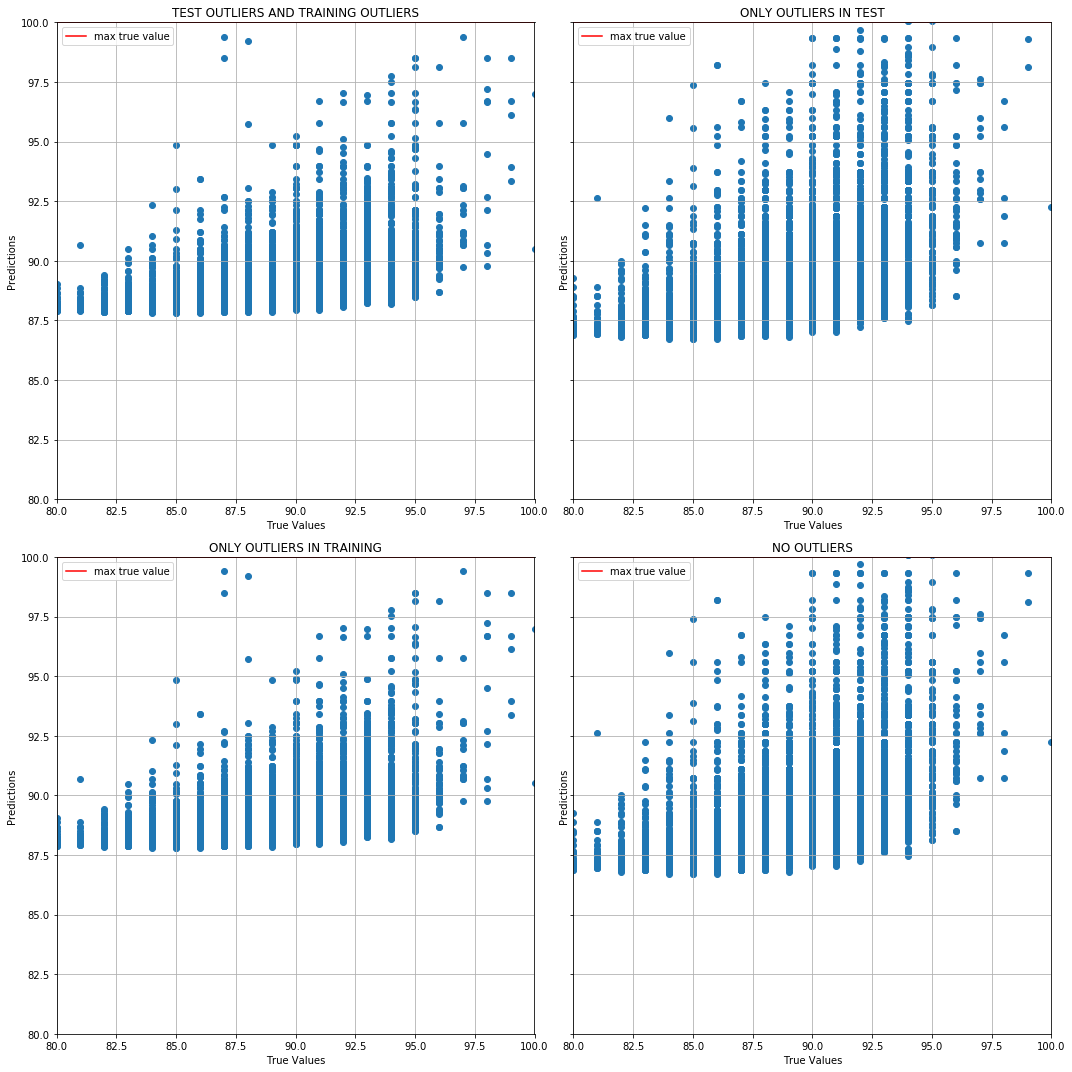

In [169]:
f, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))

# Dirty test outliers
print("************OUTLIERS IN TEST DATA **************")
# plot w/ outliers in training data
ax3.scatter(ax3_y_test, ax3_y_predictions)
ax3.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax3_y_predictions))
min_y_predictions = int(min(ax3_y_predictions))

print("--> TEST OUTLIERS AND TRAINING OUTLIERS")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_3)
print()

max_y_true = int(max(ax3_y_test.points))
min_y_true = int(min(ax3_y_test.points))

ax3.axhline(max_y_true,label='max true value', color="red")

ax3.legend()
ax3.grid()
ax3.set_xlim([80,100])
ax3.set_ylim([80,100])
ax3.set_title('TEST OUTLIERS AND TRAINING OUTLIERS')

# plot w/o outliers in training data
ax4.scatter(ax4_y_test, ax4_y_predictions)
ax4.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax4_y_predictions))
min_y_predictions = int(min(ax4_y_predictions))

print("--> ONLY OUTLIERS IN TEST")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_4)

max_y_true = int(max(ax4_y_test.points))
min_y_true = int(min(ax4_y_test.points))

ax4.axhline(max_y_true,label='max true value', color="red")

ax4.legend()
ax4.grid()
ax4.set_xlim([80,100])
ax4.set_ylim([80,100])
ax4.set_title('ONLY OUTLIERS IN TEST')

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

print()

# Clean test
print("************CLEAN TEST DATA**************")
# plot w/ outliers in training data
ax1.scatter(ax1_y_test, ax1_y_predictions)
ax1.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax1_y_predictions))
min_y_predictions = int(min(ax1_y_predictions))

print("--> ONLY OUTLIERS IN TRAINING:")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_1)
print()

max_y_true = int(max(ax1_y_test.points))
min_y_true = int(min(ax1_y_test.points))

ax1.axhline(max_y_true,label='max true value', color="red")

ax1.legend()
ax1.grid()
ax1.set_xlim([80,100])
ax1.set_ylim([80,100])
ax1.set_title('ONLY OUTLIERS IN TRAINING')

# plot w/o outliers in training data
ax2.scatter(ax2_y_test, ax2_y_predictions)
ax2.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax2_y_predictions))
min_y_predictions = int(min(ax2_y_predictions))

print("--> NO OUTLIERS:")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_2)

max_y_true = int(max(ax2_y_test.points))
min_y_true = int(min(ax2_y_test.points))

ax2.axhline(max_y_true,label='max true value', color="red")

ax2.legend()
ax2.grid()
ax2.set_xlim([80,100])
ax2.set_ylim([80,100])
ax2.set_title('NO OUTLIERS')

plt.tight_layout()

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

